In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
# loading the data
pima = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
# 
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset has some 0 values instead of Null values
for column in pima.columns:
    print("{col} has ".format(col = column),pima[pima[column]==0][column].count(),"zeros")

Pregnancies has  111 zeros
Glucose has  5 zeros
BloodPressure has  35 zeros
SkinThickness has  227 zeros
Insulin has  374 zeros
BMI has  11 zeros
DiabetesPedigreeFunction has  0 zeros
Age has  0 zeros
Outcome has  500 zeros


In [5]:
# For data preporcessing, a copy is needed.
df = pima.copy()

In [6]:
# 0's in the features below must be filled
# Filled with mean values of itself
features_dealing_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for features in features_dealing_with_zero:
    df[features].replace(0,np.nan,inplace=True)
    df[features].fillna(pima[features].mean(),inplace=True)

In [7]:
df.Insulin = df.Insulin.astype(int)
df.SkinThickness = df.SkinThickness.astype(int)

# 0's in outcome transformed into -1, it is more appropriate
df.Outcome = df.Outcome.replace(0,-1)
df.Outcome = df.Outcome.astype(int)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79,33.6,0.627,50,1
1,1,85.0,66.0,29,79,26.6,0.351,31,-1
2,8,183.0,64.0,20,79,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,-1
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [8]:
X = df.iloc[:-100,:-1]
x_test = df.iloc[-100:,:-1]
Y = df.iloc[:-100,-1]
y_test = df.iloc[-100:,-1]

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
kfold = KFold(n_splits = 2)
LRclf = LinearRegression()
training_score = []
testing_score = []

# Training on the 2 fold cross validation
for train_index, test_index in kfold.split(X):
#     print(train_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    LRclf.fit(X_train,Y_train)
    training_score.append(LRclf.score(X,Y))
    train_predictions = LRclf.predict(X_test)
    train_predictions[train_predictions < train_predictions.mean()] = -1
    train_predictions[train_predictions >= train_predictions.mean()] = 1
    testing_score.append(accuracy_score(Y_test, train_predictions))
# Results scores
print("training_score{training_score}".format(training_score=training_score))
print("testing_score{testing_score}".format(testing_score=testing_score))

training_score[0.3077697356471617, 0.30902769327480284]
testing_score[0.7335329341317365, 0.7604790419161677]


In [11]:
# Performance of at 100 samples 
LR_preds = LRclf.predict(x_test)
LR_preds[LR_preds < LR_preds.mean()] = -1
LR_preds[LR_preds >= LR_preds.mean()] = 1
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

          -1       0.84      0.75      0.79        63
           1       0.64      0.76      0.69        37

    accuracy                           0.75       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.76      0.75      0.75       100



<AxesSubplot:>

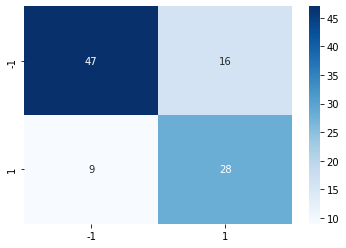

In [12]:
# Confusion matrix scores
cm = confusion_matrix(y_test, LR_preds)
sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=['-1','1'], yticklabels=['-1','1'])

In [13]:
GNB = GaussianNB()
training_score = []
testing_score = []


# Training on the 2 fold cross validation
for train_index, test_index in kfold.split(X):
#     print(train_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    GNB.fit(X_train,Y_train)
    training_score.append(GNB.score(X,Y))
    train_predictions = GNB.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

In [14]:
# Results scores
print("training_score{training_score}".format(training_score=training_score))
print("testing_score{testing_score}".format(testing_score=testing_score))

training_score[0.7455089820359282, 0.7485029940119761]
testing_score[0.7065868263473054, 0.7754491017964071]


In [15]:
# Performance of at 100 samples
GNB_preds = GNB.predict(x_test)
print(classification_report(y_test, GNB_preds))

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78        63
           1       0.63      0.59      0.61        37

    accuracy                           0.72       100
   macro avg       0.70      0.69      0.70       100
weighted avg       0.72      0.72      0.72       100



<AxesSubplot:>

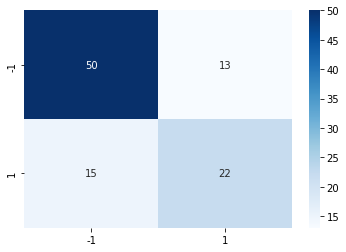

In [16]:
# Confusion matrix scores
cm = confusion_matrix(y_test, GNB_preds)
sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=['-1','1'], yticklabels=['-1','1'])

In [17]:
df.to_csv("./filled.csv", index=False)